In [1]:
# importing liabraries
import numpy as np
import pandas as pd

In [2]:
## Load the dataset
dt=pd.read_csv("Churn_Modelling.csv")
dt.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dt["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Creating dependent and independent features

In [4]:
X=dt.iloc[:,3:13]
y=dt.iloc[:,13]

In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
# create dummy variables for categorial features
Geography=pd.get_dummies(X["Geography"],drop_first=True)
Gender=pd.get_dummies(X["Gender"],drop_first=True)

In [8]:
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [9]:
Geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [10]:
X.drop(["Gender","Geography"],axis=1,inplace=True)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
X=pd.concat([X,Gender,Geography],axis=1)

## Train test split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Fearure scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

* we do scaling beacuse if inputs like (x11,x2,x3) is big and on diff scale it will take time to multtiply with weights and hece covergence will again take time to happen

# Neural Network

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,ReLU,ELU,PReLU,Dropout

In [15]:
# initialize the ANN
classifier = Sequential()

In [16]:
# Adding first input layer and the first hidden layer
# unit means the hidden layer is of 6 neuron
# input dim is 11 neuron as in X there are 11 variables
# he_uniform works well with relu
classifier.add(Dense(units=6,kernel_initializer ="he_uniform",activation="relu",input_dim=11))

# Adding Second hidden layer
classifier.add(Dense(units=6,kernel_initializer ="he_uniform",activation="relu"))

# Adding Output layer
classifier.add(Dense(units=1,kernel_initializer ="glorot_uniform",activation="sigmoid"))

# Compile the model
classifier.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

## validation_split
* it is used so that we can test our dataset separately for the test dataset

In [17]:
# fitting the ANN to Trainig set
model=classifier.fit(X_train,y_train, validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 5s 6ms/step - loss: 0.5864 - accuracy: 0.7947 - val_loss: 0.5302 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4969 - accuracy: 0.7962 - val_loss: 0.4835 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4581 - accuracy: 0.7970 - val_loss: 0.4536 - val_accuracy: 0.7974
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4315 - accuracy: 0.8069 - val_loss: 0.4349 - val_accuracy: 0.8103
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4178 - accuracy: 0.8192 - val_loss: 0.4262 - val_accuracy: 0.8099
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4119 - accuracy: 0.8222 - val_loss: 0.4215 - val_accuracy: 0.8133
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4079 - accuracy: 0.8242 - val_loss: 0.4197 - val_accuracy: 0.8145
Epoch 

In [18]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(*args, **kw)>

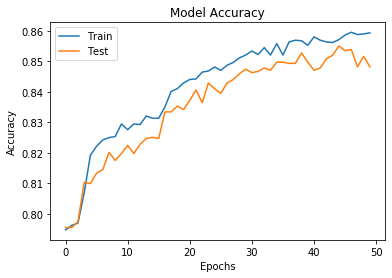

In [19]:
# Summarise history for accuracy
plt.plot(model.history["accuracy"])
plt.plot(model.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train","Test"],loc="upper left")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

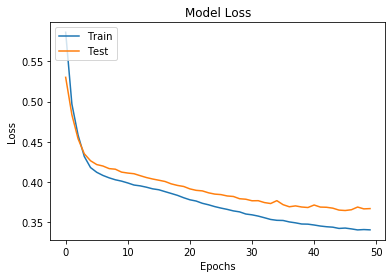

In [20]:
# Summarise history for Loss
plt.plot(model.history["loss"])
plt.plot(model.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Test"],loc="upper left")
plt.show

# Predictions

In [21]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1511,   84],
       [ 196,  209]], dtype=int64)

In [23]:
# calculate accuracy
score=accuracy_score(y_pred,y_test)
score

0.86